
|       | Ile 1 | Ile 2 | Ile 3 | Ile 4 |
|-------|-------|-------|-------|-------|
| **Ile 1** | 0     | 0.3   | 0.3   | 0.4   |
| **Ile 2** | 0.3   | 0     | 0.4   | 0.3   |
| **Ile 3** | 0.3   | 0.4   | 0     | 0.3   |
| **Ile 4** | 0.4   | 0.3   | 0.3   | 0     |

In [38]:
# diviser la poputions en sous populations (5 pour les 5 opérateurs de mutation => 1 opérateur par ile)
# migrations d'une ile a l'autre géré par des probabilités
# matrice de transition pour stocker les probabilités de migration
# graphe de transition des iles complet (chaque ile est reliée à toutes les autres)
# a chaque migration, on récupère le feedback de la fitness de l'individu migré et on met à jour la matrice de transition
# 𝑀(𝑡+1) = 𝑓(𝑀 𝑡 ) => f est une fonction de mise à jour de la matrice de transition
# variables du problème :
# • Ensemble d’iles 𝐼 = {𝑖1,…, 𝑖𝑛}
# • Ensemble d’opérateurs/algos A = {𝑎1,…, 𝑎𝑛}, 𝑎𝑘 
# affecté à 𝑖𝑘
# • Ensemble de populations P = {𝑝1,…, 𝑝𝑛}
# • Topologie 𝐼, 𝑉 (ici graphe complet)
# • Matrice de migration 𝑀 de taille 𝑛 × 𝑛, 𝑀 𝑖, 𝑗 ∈ 0,1
# • Politique de migration Π: 𝐼 × 𝑀 → 𝐼

# fonction f de learing de la matrice de transition
# 𝑀(𝑡+1) = 1 − 𝛽 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k + 𝛽𝑁 𝑡 (𝑘)
# 𝛽𝑁 𝑡 (𝑘) bruit de migration (permet la diversification)
# 1 − 𝛼 𝑅 t k  R => récompense de la migration alpha est le taux d'apprentissage
# 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k meme stratégie de mis a jour que pour les Q-Learning
# 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k  partie réenforcement
# # fonction de récompense :
# 𝐸𝑙𝑖𝑡𝑖𝑠𝑡 𝑅𝑖
# 𝑡 𝑘 =
# 1 / |𝐵| 𝑖𝑓 𝑘 ∈ 𝐵𝑒𝑠𝑡 sinon
# 0

# pseudo code de l'algorithme
# Initialize population;
# repeat
# foreach population do
# foreach individual do
# One local search iteration;
# Update the Transition Matrix T;
# Migration Process;
# until stop condition;
# Algorithm : Generic Dynamic Island Model (DIM)

# he crucial point concerns the update of the transition
# matrix T , which follows a learning process:
# Tt = (1 − β)(α.Tt−1 + (1 − α).Rt) + β.Nt

# For an easier representation, we identify each island
# by an ordinal; for example, ({1, . . . , N }, {1, . . . , N }2)
# represents the topology of a N -islands model.
# Migration policies are given by a transition (stochas-
# tic) matrix T of size n, where T (i, j) represents the
# probability for an individual to migrate from island i to
# island j (or to stay at the same island if i = j). Since
# the model is dynamic, T can be updated before of after
# each migration process. One can denote Tt the matrix
# at time (or generation) t

# reward function
# Rt(i, j) =
# {
# 1/|B| if j ∈ B,
# 0 otherwise,
# with B = argmax
# j′
# ∑
# x∈Mij′t acc(x)
# |Mij′t|

# la reward se caclul sur l'ameliortion de la fitness de l'individu migré. on calcul l'amelioration moyenne pour chaque ile ou on a envoyé des individu.
# on partage la reward entre les iles qui ont reçu des individus qui ont amélioré la meilleur amelioraiton moyenne.
# B : meilleur ile => | B | nombre des meilleurs ile, ils devront partager la reward


matrice de migration
[[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]
matrice de récompense
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
--- Génération 1 ---
Ile 1flip: Meilleur Fitness = 1, Population = 20
Ile 3flip: Meilleur Fitness = 3, Population = 20
Ile 5flip: Meilleur Fitness = 5, Population = 20
Ile BitFlip: Meilleur Fitness = 5, Population = 20
Meilleur Fitness Global: 5

matrice de migration
[[0.39690721649484534, 0.20103092783505155, 0.20103092783505155, 0.20103092783505155], [0.20103092783505155, 0.39690721649484534, 0.20103092783505155, 0.20103092783505155], [0.20103092783505155, 0.20103092783505155, 0.39690721649484534, 0.20103092783505155], [0.20103092783505155, 0.20103092783505155, 0.20103092783505155, 0.39690721649484534]]
matrice de récompense
[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]
matrice de migration
[[0.51200977787224

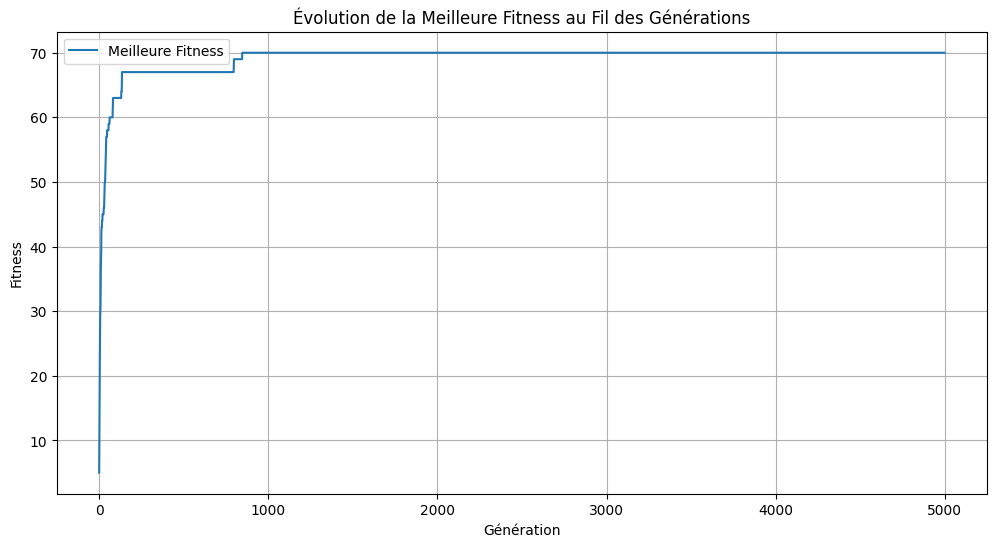

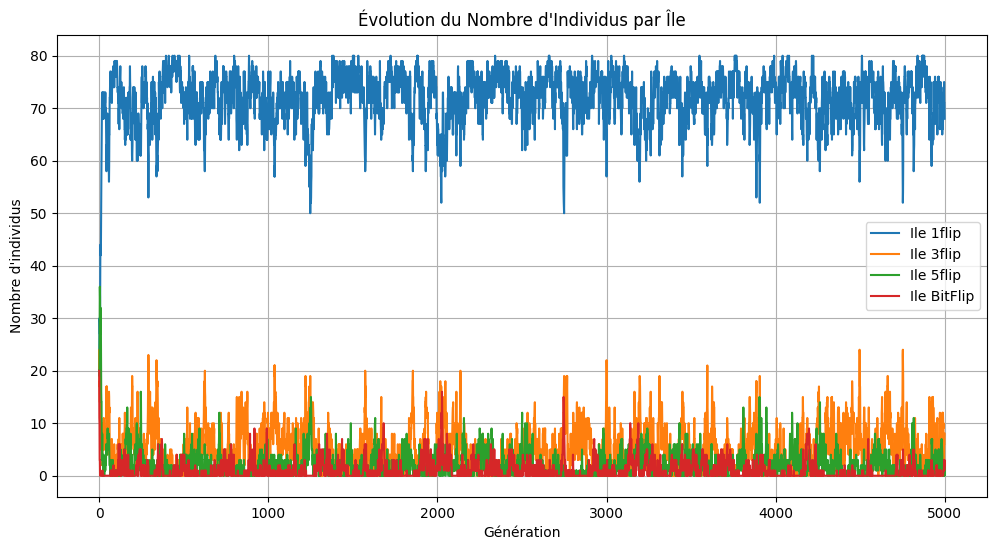

matrice de migration
[[0.9285714285714286, 0.023809523809523826, 0.023809523809523826, 0.023809523809523826], [0.4241357127340906, 0.5282452396468618, 0.023809523809523808, 0.023809523809523808], [0.48637168944870346, 0.457885889558933, 0.031932895751596996, 0.023809525240766485], [0.02461610163594569, 0.4130552706720719, 0.27832481556419514, 0.28400381212778736]]
matrice de récompense
[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]]


In [39]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Définition des constantes
TAILLE_VECTEUR = 100
TAILLE_POPULATION = 20
MAX_ITER = 5000
N = 4  # Nombre d'îles

# Définition des opérateurs de mutation
def mutation1flip(individu):
    """Mutation qui inverse un seul bit aléatoire."""
    idx = random.randint(0, TAILLE_VECTEUR - 1)
    individu.bits[idx] = 1 - individu.bits[idx]
    return individu

def mutation3flip(individu):
    """Mutation qui inverse trois bits aléatoires distincts."""
    indices = random.sample(range(TAILLE_VECTEUR), 3)
    for idx in indices:
        individu.bits[idx] = 1 - individu.bits[idx]
    return individu

def mutation5flip(individu):
    """Mutation qui inverse cinq bits aléatoires distincts."""
    indices = random.sample(range(TAILLE_VECTEUR), 5)
    for idx in indices:
        individu.bits[idx] = 1 - individu.bits[idx]
    return individu

def mutationBitFlip(individu):
    """Mutation qui inverse chaque bit avec une probabilité de 1/TAILLE_VECTEUR."""
    for i in range(TAILLE_VECTEUR):
        if random.random() < 1/TAILLE_VECTEUR:
            individu.bits[i] = 1 - individu.bits[i]
    return individu

# Définition des classes
class Individu:
    def __init__(self):
        # Initialisation aléatoire des bits
        self.bits = [0 for _ in range(TAILLE_VECTEUR)]
        self.origin = None
        self.currentIsland = None
        self.upgrade = 0
    
    def getFitness(self):
        return sum(self.bits)

class Island:
    def __init__(self, id, operator, name):
        self.id = id
        self.population = [Individu() for _ in range(TAILLE_POPULATION)]
        self.operator = operator
        self.name = name
        
    def getBestElement(self):
        if not self.population:
            return None
        return max(self.population, key=lambda x: x.getFitness())
    
    def getBestFitness(self):
        best = self.getBestElement()
        if best:
            return best.getFitness()
        return 0

class Archipelo:
    def __init__(self):
        self.islands = [
            Island(0, mutation1flip, "Ile 1flip"),
            Island(1, mutation3flip, "Ile 3flip"),
            Island(2, mutation5flip, "Ile 5flip"),
            Island(3, mutationBitFlip, "Ile BitFlip")
        ]
        self.migrationMatrix = [[1/N for _ in range(N)] for _ in range(N)]
        self.rewardMatrix = [[0.0 for _ in range(N)] for _ in range(N)]
        self.bestFitness = 0
        self.bestIndividual = None  # Renommé pour refléter qu'il s'agit d'un individu
        self.alpha = 0.8  # Ajusté
        self.beta = 0.05   # Ajusté
        self.noise = 0.1
        
    def getBestElement(self):
        # Sélectionner le meilleur élément parmi toutes les îles non vides
        best_elements = []
        for island in self.islands:
            best = island.getBestElement()
            if best is not None:
                best_elements.append(best)
        if not best_elements:
            return None
        return max(best_elements, key=lambda x: x.getFitness())
    
    def getBestFitness(self):
        best_element = self.getBestElement()
        if best_element:
            return best_element.getFitness()
        return 0
    
    def updateMigrationMatrix(self):
        for i in range(N):
            for j in range(N):
                self.migrationMatrix[i][j] = (
                    (1 - self.beta) * (
                        self.alpha * self.migrationMatrix[i][j] + 
                        (1 - self.alpha) * self.rewardMatrix[i][j]
                    ) + 
                    self.beta * self.noise
                )
        # Normaliser la matrice de migration
        for i in range(N):
            row_sum = sum(self.migrationMatrix[i])
            if row_sum != 0:
                self.migrationMatrix[i] = [prob / row_sum for prob in self.migrationMatrix[i]]
            else:
                # Si la somme est 0, réinitialiser à une distribution uniforme
                self.migrationMatrix[i] = [1/N for _ in range(N)]

    
   def updateRewardMatrix(self):
    num_islands = len(self.islands)
    # Initialiser la matrice de récompense
    self.rewardMatrix = [[0.0 for _ in range(num_islands)] for _ in range(num_islands)]
    
    # Créer un mapping d'id à index pour les îles
    id_to_index = {island.id: index for index, island in enumerate(self.islands)}
    
    for source_island in self.islands:
        # Récupérer tous les migrants dont l'origine est source_island.id
        migrants = [ind for island in self.islands for ind in island.population if ind.origin == source_island.id]
        
        # Séparer les migrants par île de destination
        migrantsByDestination = defaultdict(list)
        for ind in migrants:
            migrantsByDestination[ind.currentIsland].append(ind)
        
        # Calculer la fitness moyenne pour chaque île de destination
        fitness_moyenne = {}
        for dest_island in self.islands:
            migrants_dest = migrantsByDestination.get(dest_island.id, [])
            if migrants_dest:
                fitness_moyenne[dest_island.id] = sum(ind.getFitness() for ind in migrants_dest) / len(migrants_dest)
            else:
                fitness_moyenne[dest_island.id] = 0
        
        if fitness_moyenne:
            max_fitness = max(fitness_moyenne.values())
        else:
            max_fitness = 0
        
        # Déterminer les meilleures îles
        best_island_ids = [island_id for island_id, fitness in fitness_moyenne.items() if fitness == max_fitness and fitness > 0]
        bestIslands = [island for island in self.islands if island.id in best_island_ids]
        
        # Partager la récompense entre les meilleures îles
        if bestIslands:
            reward_per_best = 1.0 / len(bestIslands)
            source_index = id_to_index[source_island.id]
            for best in bestIslands:
                best_index = id_to_index[best.id]
                self.rewardMatrix[source_index][best_index] += reward_per_best
        else:
            # Si aucune île n'est meilleure, attribuer une récompense uniforme minimale
            source_index = id_to_index[source_island.id]
            for j in range(num_islands):
                self.rewardMatrix[source_index][j] += 1.0 / num_islands * 0.1  # Ajustez le facteur selon vos besoins



    
    def applyMutation(self):
        for island in self.islands:
            for ind in island.population:
                fitness_before = ind.getFitness()
                island.operator(ind)
                fitness_after = ind.getFitness()
                ind.upgrade = fitness_after - fitness_before
    
    def migration(self):
        for source_island in self.islands:
            destinations = list(range(N)) 
            probabilities = self.migrationMatrix[source_island.id]
            # Permettre que toutes les populations puissent devenir vides
            for ind in source_island.population[:]:
                destination = random.choices(destinations, weights=probabilities, k=1)[0]
                # Mettre à jour les informations de l'individu
                ind.origin = source_island.id
                ind.currentIsland = destination
                
                # Effectuer la migration
                source_island.population.remove(ind)
                self.islands[destination].population.append(ind)

        
    def evaluate(self):
        """Met à jour le meilleur fitness global."""
        current_best = self.getBestFitness()
        if current_best > self.bestFitness:
            self.bestFitness = current_best
            self.bestIndividual = self.getBestElement()
    
    def displayStatus(self, generation):
        """Affiche le statut actuel de l'algorithme."""
        print(f"--- Génération {generation} ---")
        for island in self.islands:
            best_fit = island.getBestFitness()
            population_size = len(island.population)
            print(f"{island.name}: Meilleur Fitness = {best_fit}, Population = {population_size}")
        print(f"Meilleur Fitness Global: {self.bestFitness}\n")

def main():
    # Initialisation de l'algorithme
    archipelo = Archipelo()
    
    # Initialisation des îles : Assignation de currentIsland et origin pour chaque individu
    for island in archipelo.islands:
        for ind in island.population:
            ind.currentIsland = island.id
            ind.origin = island.id  # Initialement, l'origine est la même que l'île actuelle
            # S'assurer que les bits sont bien aléatoires
            ind.bits = [0 for _ in range(TAILLE_VECTEUR)]
    
    # Initialiser le suivi de la population de chaque île
    population_history = {island.name: [] for island in archipelo.islands}
    
    # Liste pour stocker la meilleure fitness à chaque itération
    best_fitness_history = []
    
    # Boucle principale de l'algorithme
    for generation in range(1, MAX_ITER + 1):
        if(generation < 20 or generation % 1000 == 0):
            print("matrice de migration")
            print(archipelo.migrationMatrix)
            print("matrice de récompense")
            print(archipelo.rewardMatrix)
        # 1. Appliquer les mutations
        archipelo.applyMutation()
        
        # 2. Évaluer et mettre à jour le meilleur fitness
        archipelo.evaluate()
        
        # 3. Enregistrer la meilleure fitness pour le plot
        best_fitness_history.append(archipelo.bestFitness)
        
        # 4. Enregistrer la taille de la population de chaque île
        for island in archipelo.islands:
            population_history[island.name].append(len(island.population))
        
        # 5. Afficher le statut actuel toutes les 1000 générations pour éviter trop de sorties
        if generation % 1000 == 0 or generation == 1:
            archipelo.displayStatus(generation)
        
        # 6. Mettre à jour la matrice de récompense
        archipelo.updateRewardMatrix()
        
        # 7. Mettre à jour la matrice de migration
        archipelo.updateMigrationMatrix()
        
        # 8. Effectuer la migration
        archipelo.migration()
        
        # Optionnel : Arrêter prématurément si une fitness maximale est atteinte
        if archipelo.bestFitness == TAILLE_VECTEUR:
            print(f"Fitness maximale atteinte à la génération {generation}.")
            break
    
    # Tracer l'évolution de la meilleure fitness
    plt.figure(figsize=(12, 6))
    plt.plot(best_fitness_history, label='Meilleure Fitness')
    plt.xlabel('Génération')
    plt.ylabel('Fitness')
    plt.title('Évolution de la Meilleure Fitness au Fil des Générations')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Tracer l'évolution du nombre d'individus par île
    plt.figure(figsize=(12, 6))
    for name, history in population_history.items():
        plt.plot(history, label=name)
    plt.xlabel('Génération')
    plt.ylabel('Nombre d\'individus')
    plt.title('Évolution du Nombre d\'Individus par Île')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("matrice de migration")
    print(archipelo.migrationMatrix)
    print("matrice de récompense")
    print(archipelo.rewardMatrix)

if __name__ == "__main__":
    main()
